# 텍스트 예측 분류

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ckonlpy.tag import Twitter #konlpy twitter는 add_dictionary가 없어서, ckonlpy(customized konlpy) 사용.
twitter = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


# ⑴ 자료 읽어오기

In [3]:
df2 = pd.read_csv('new_data_8529.csv', sep='\t', encoding='UTF-8')

In [4]:
df = df2.loc[df2['대상 선정']=='O',:] # 대상 선정값이 O 인 것만 가져오기 (X제외)

In [5]:
df = df.reindex()

In [6]:
df.columns

Index(['std_clm_type_cd', 'ro_y', 'clm_jgmt_dt', 'ceq_caus_cd', 'ceq_psit_cd',
       'ceq_psit_nm', 'trim_plnt_cd', 'prj_vehl_cd', 'mdl_cd', 'part_sys_cd',
       'repn_part_cd', 'clm_prtl_sbc', '대상 선정', '구분', '책임구', '원인', '검토결과'],
      dtype='object')

In [7]:
df.head(3)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
12               W  2017     20171010         ZZ7         B11  조립 문제_미장착/오장착   
14               W  2018     20180725         ZZ7         B11  조립 문제_미장착/오장착   
15               W  2015     20151114         ZZ3         B11  조립 문제_미장착/오장착   

   trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
12         KV11          CK     J5          AC        91500   
14         KV11          YP     A9          EE        28291   
15         KV11          YP     A9          TT        81750   

                                         clm_prtl_sbc 대상 선정       구분   책임구  \
12  [C] 현상-1. 현상  가. 인도후 오디오 작동시 주파수 및 노이즈 발생으로 고객...     O  기능(커넥터)  생산공장   
14  [C] 1. 현상  주행중 엔진경고등 점등2. 점검내용 및 원인  스캔점검결과 P2...     O  기능(커넥터)  생산공장   
15  [C] 차량 테일게이트트림에서 뜨르르르 이상소음발생으로 테일게이트트림 탈착하여 확인...     O   실내부품이음  생산공장   

     원인                검토결과  
12  미결선  O-기능(커넥터)-생산공장-미결선  
14   기타   O-기능(커넥터)-생산공장-기타  
15   이물    O-실내부품이음-생산공장-이물

In [8]:
df.shape

(3012, 17)

# ⑵ 자료분류현황

In [9]:
category_count = df['대상 선정'].value_counts()
category_count

O    3012
Name: 대상 선정, dtype: int64

In [10]:
category_count = df['구분'].value_counts()
category_count

기능(커넥터)    1601
실내부품이음     1050
하체이음        361
Name: 구분, dtype: int64

In [11]:
category_count = df['책임구'].value_counts()
category_count

구매      2274
생산공장     724
연구소       14
Name: 책임구, dtype: int64

In [12]:
category_count = df['원인'].value_counts()
category_count

부품       2274
조립불량      230
결선불량      225
체결불량      103
기타        100
미결선        37
이종/간섭      21
설계/구조      14
이물          8
Name: 원인, dtype: int64

# ⑶ null값 확인 및 처리하기

In [13]:
# 제거
# df = df[df['대상 선정'].notnull()].copy()
# 다른값으로 채우기
df = df.fillna('N')

In [14]:
df = df.reindex()

In [15]:
df.shape

(3012, 17)

In [16]:
category_count = df['대상 선정'].value_counts()
category_count

O    3012
Name: 대상 선정, dtype: int64

In [17]:
category_count = df['구분'].value_counts()
category_count

기능(커넥터)    1601
실내부품이음     1050
하체이음        361
Name: 구분, dtype: int64

In [18]:
category_count = df['책임구'].value_counts()
category_count

구매      2274
생산공장     724
연구소       14
Name: 책임구, dtype: int64

In [19]:
category_count = df['원인'].value_counts()
category_count

부품       2274
조립불량      230
결선불량      225
체결불량      103
기타        100
미결선        37
이종/간섭      21
설계/구조      14
이물          8
Name: 원인, dtype: int64

In [20]:
df[df['구분'].isnull()]

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과]
Index: []

In [21]:
df[df['원인'].isnull()]

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과]
Index: []

In [22]:
df[df['책임구'].isnull()]

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과]
Index: []

In [23]:
df.shape

(3012, 17)

# ⑷ 단어 전처리

In [24]:
# 예측값과 실제값 비교를 위해 컬럼을 하나 더 생성합니다.
# df['result_pred'] = df['검토결과'].astype(str).copy()
# df['target_pred'] = df['대상 선정'].astype(str).copy()
# df['charge_pred'] = df['책임구'].astype(str).copy()
df['division_pred'] = df['구분'].astype(str).copy()

In [25]:
df['division_pred'].head()

12    기능(커넥터)
14    기능(커넥터)
15     실내부품이음
19    기능(커넥터)
24    기능(커넥터)
Name: division_pred, dtype: object

### (ㄱ) 오타, 동의어 처리(replace)

In [26]:
userdic = pd.read_csv('usedic2.csv', sep='\t', encoding='UTF-8')
userdic['User Dic.'][0:1]
userdic = userdic.rename(columns = {'User Dic.':'standard'})
userdic = userdic.rename(columns = {'동의어':'missprint'})
userdic = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic.rename(columns = {'User Dic.':'standard'})
userdic_list = userdic.rename(columns = {'동의어':'missprint'})
userdic_list = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic_list.fillna('')
userdic = userdic.fillna('')

In [27]:
userdic_list[:5]

stops standard missprint
0    (LH)      가니쉬       가니시
1    (RH)      가벼움          
2  (사진첨부)       가스        개스
3     (우)       가죽          
4     (좌)       간격        간극

In [28]:
userdic[:5]

stops standard missprint
0    (LH)      가니쉬       가니시
1    (RH)      가벼움          
2  (사진첨부)       가스        개스
3     (우)       가죽          
4     (좌)       간격        간극

In [29]:
userdic.shape

(1184, 3)

In [30]:
replace_word = userdic.iloc[:,1:3]
replace_word = replace_word[replace_word.missprint != '']
replace_word.head()

standard missprint
0      가니쉬       가니시
2       가스        개스
4       간격        간극
5       간격         갭
6    간격 단차       간단차

In [31]:
replace_word.shape

(474, 2)

In [32]:
df['clm_prtl_sbc'].iloc[488]

'[C] 1.현상  220V 인버터 작동 불량  ECM룸미러 작동 불량  VDC OFF 스위치 작동 불량  히터컨트롤 작동 AVN 화면 표시불량2.점검  현상 확인시 상기 현상 지속되며 히터 컨트롤 조작시 AVN 화면이 약 0.2초 가량만 표시됨3.점검내용 및 원인  배선 점검시 ECM R39커넥터 10번단자 전원인가 불량확인함  VDC OFF 스위치 및 인버터 스위치 M11 커넥터 10번단자 전원인가 불량확인함  히터 컨트롤 M08-B 커넥터 7번 전원인가 불량 확인함  실내 정션박스 휴즈 모듈4 7.5A 정상 및 핀정상 확인  메인 배선 점검 위해 배선 일부 이격 실시 및 히터 컨트롤 및 AVN헤드 유닛등 탈착 실시함  JM01 커넥터 16~23번 단자 전원 인가 불량 확인함  IP-G 9번 단자와 JM01 18번 단자간의 도통 점검시 정상임 핀 점검시 IP-G 9번 헐거움  해당 단자 교환 및 정상 조립후 상기현상 해소됨3.조치내용  배선 점검 및 수정 실시함'

In [33]:
replaceword_list =  replace_word['standard'].tolist()
missword_list = replace_word['missprint'].tolist()
print(len(replaceword_list))
print(len(missword_list))

474
474


In [34]:
for i in range(len(replaceword_list)):
    df['clm_prtl_sbc'] = df['clm_prtl_sbc'].replace(missword_list[i],replaceword_list[i],regex=True)
#regex=True 설정을 주면 조사가 붙어있던 말던 단어를 다 바꿔준다.

In [35]:
df[df['clm_prtl_sbc'].isin(['간극','가니시'])] # 오타'간극','가니시'가 검색되는지 확인

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과, division_pred]
Index: []

## (ㄴ) 사용자 단어정의

In [36]:
standard_word = userdic.iloc[:,1:2]
standard_word.head()

standard
0      가니쉬
1      가벼움
2       가스
3       가죽
4       간격

In [37]:
udw_list =  standard_word['standard'].tolist() # 단어들만 list로 추출.

In [38]:
for word in udw_list: 
    twitter.add_dictionary(word, 'Noun') # for문을 통해 dictionary에 단어들을 Noun으로 추가.

In [39]:
twitter.pos(df['clm_prtl_sbc'].iloc[1]) # '리어', '미장착'이 Noun으로 잘 정의되었는지 확인.

[('[', 'Punctuation'),
 ('C', 'Alpha'),
 (']', 'Punctuation'),
 ('1', 'Number'),
 ('.', 'Punctuation'),
 ('현상', 'Noun'),
 ('주행', 'Noun'),
 ('중', 'Noun'),
 ('엔진', 'Noun'),
 ('경고등', 'Noun'),
 ('점등', 'Noun'),
 ('2', 'Number'),
 ('.', 'Punctuation'),
 ('점검', 'Noun'),
 ('내용', 'Noun'),
 ('및', 'Noun'),
 ('원인', 'Noun'),
 ('스캔', 'Noun'),
 ('점검', 'Noun'),
 ('결과', 'Noun'),
 ('P', 'Alpha'),
 ('200300', 'Number'),
 ('DPF', 'Alpha'),
 ('효율', 'Noun'),
 ('저하', 'Noun'),
 ('발생', 'Noun'),
 ('됨', 'Verb'),
 ('(', 'Punctuation'),
 ('임시', 'Noun'),
 ('코드', 'Noun'),
 (')', 'Punctuation'),
 ('주행', 'Noun'),
 ('점검', 'Noun'),
 ('결과', 'Noun'),
 ('경고등', 'Noun'),
 ('점등', 'Noun'),
 ('됨', 'Verb'),
 ('3', 'Number'),
 ('.', 'Punctuation'),
 ('조치', 'Noun'),
 ('내용', 'Noun'),
 ('DPF', 'Alpha'),
 ('및', 'Noun'),
 ('차압', 'Noun'),
 ('센서', 'Noun'),
 ('교환', 'Noun'),
 ('후', 'Noun'),
 ('시운전', 'Noun'),
 ('결과', 'Noun'),
 ('정상', 'Noun'),
 ('스로틀', 'Noun'),
 ('플랩', 'Noun'),
 ('쪽', 'Noun'),
 ('호스', 'Noun'),
 ('미장착', 'Noun'),
 ('되어', 'Ver

## ◈ 트위터 명사추출 및 불용어 제거 

### 1. 명사추출

In [42]:
def nouns(text):
    text = str(text)
    text = twitter.nouns(text)
    return text

In [43]:
df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(nouns)

In [44]:
df.head(2)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
12               W  2017     20171010         ZZ7         B11  조립 문제_미장착/오장착   
14               W  2018     20180725         ZZ7         B11  조립 문제_미장착/오장착   

   trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
12         KV11          CK     J5          AC        91500   
14         KV11          YP     A9          EE        28291   

                                         clm_prtl_sbc 대상 선정       구분   책임구  \
12  [현상, 현상, 인도, 후, 오디오, 작동, 시, 주파수, 및, 이음, 발, 생으로...     O  기능(커넥터)  생산공장   
14  [현상, 주행, 중, 엔진, 경고등, 점등, 점검, 내용, 및, 원인, 스캔, 점검...     O  기능(커넥터)  생산공장   

     원인                검토결과 division_pred  
12  미결선  O-기능(커넥터)-생산공장-미결선       기능(커넥터)  
14   기타   O-기능(커넥터)-생산공장-기타       기능(커넥터)

In [46]:
df.iloc[1,11]

['현상',
 '주행',
 '중',
 '엔진',
 '경고등',
 '점등',
 '점검',
 '내용',
 '및',
 '원인',
 '스캔',
 '점검',
 '결과',
 '효율',
 '저하',
 '발생',
 '임시',
 '코드',
 '주행',
 '점검',
 '결과',
 '경고등',
 '점등',
 '조치',
 '내용',
 '및',
 '차압',
 '센서',
 '교환',
 '후',
 '시운전',
 '결과',
 '정상',
 '스로틀',
 '플랩',
 '쪽',
 '호스',
 '미장착',
 '출고']

In [47]:
type(df.iloc[1,11])

list

In [ ]:
# df.iloc[1,11]  #'리어','미장착' 붙어서 출력되었는지 확인.(8529 데이터 기준)

### 2. 특수문자제거,띄워쓰기

In [ ]:
# def preprocessing(text):
#     # 개행문자 제거
#     text= str(text)
#     text = re.sub('\\\\n', ' ', text)
#     # 특수문자 제거
#     # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
#     #text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
#     # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
#     #text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
#     # 한글, 영문만 남기고 모두 제거하도록 합니다.
#     text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
#     return text

In [ ]:
# #%time 
# df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(preprocessing)
# df['clm_prtl_sbc']

In [ ]:
# df = df.reset_index()

## 3. 불용어 제거

In [ ]:
# # 불용어 제거
# def remove_stopwords(text):
#     tokens = text.split(' ')
#     stops = ['현상', '[C]','현상및점검','현    상','현 상','점검점검','점검내용','조치내용','점검점검내용','현상및조치','C','원인',
#              '점검/원인','사진첨부','(사진첨부)','사진참조','점검및원인','동영상참조','동영상','대리점','고객','고객에게','상기',
#              '차량','상기차량은','자동차','당차량은','당차량','당','차량은','점검및조치내용','F/LH','F/RH','L/H','R/H','L/H리어',
#              'R/H리어','LH/RH','LH','RH','(RH)','(LH)','R/LH','R/RH','리어RH','리어LH','LH쪽','RH쪽','Rr','RR','FRT','Frt',
#              'frt','rr','C-10000','C-100','(좌)','(우)','A/S','결과','공임','광주','넥쏘','니로','레이','렌트','리무진',
#              '모닝','모하비','벨로스터','사진','상기','서비스','소하','스타렉스','스팅어','스포티지','신차','싼타페','써비스',
#              '쏘나타','쏘렌토','쏘울','아반떼','아산','아이오닉','언덕','엑센트','열','울산','임시 넘버','임시 번호','입고',
#              '저머검내용','점검결과','조치결과','주차장','증상','지하','철도','첨부','첨부파일','청구','출고','카 마스터','카니발',
#              '카렌스','코나','클레임','투싼','팰리세이드','하이리무진','하이브리드','현     상','현    상','현   상','현  상',
#              '현 상','현산','화성','그랜저','새벽','새차','야간','주간','그랜져','주재원','아침','밤, 심야','낮,낫','주제원']
#     meaningful_words = [w for w in tokens if not w in stops]
#     return ' '.join(meaningful_words) #stops에 안 걸리는 나머지 것들 이어붙이기

In [ ]:
# #%time 
# df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(remove_stopwords)

In [ ]:
# df['clm_prtl_sbc'].head()

## 토큰화

In [ ]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [ ]:
df.head(2)

In [ ]:
len(df)

In [ ]:
# 전처리 이전의 샘플 텍스트로 토큰화

for i in range(len(df)):
    a = 
    tokened_title = tokenizer.tokenize()
tokened_title

In [ ]:
type(df['clm_prtl_sbc'])

In [ ]:
type(df['clm_prtl_sbc'][0])

In [ ]:
# 전처리 이후의 샘플 텍스트로 토큰화
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

In [ ]:
print(len(tokened_title))
print(len(tokened_content))

In [ ]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

In [ ]:
tokens[sample_index][:10]

## Word3Vec 모델학습

In [48]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

In [49]:
# 초기화 및 모델 학습
from gensim.models import word2vec
# 모델 학습
model = word2vec.Word2Vec(df['clm_prtl_sbc'], min_count=1)
model

2019-05-28 15:00:58,472 : INFO : 'pattern' package not found; tag filters are not available for English
2019-05-28 15:00:58,494 : INFO : collecting all words and their counts
2019-05-28 15:00:58,495 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-28 15:00:58,515 : INFO : collected 3929 word types from a corpus of 100128 raw words and 3012 sentences
2019-05-28 15:00:58,516 : INFO : Loading a fresh vocabulary
2019-05-28 15:00:58,525 : INFO : effective_min_count=1 retains 3929 unique words (100% of original 3929, drops 0)
2019-05-28 15:00:58,526 : INFO : effective_min_count=1 leaves 100128 word corpus (100% of original 100128, drops 0)
2019-05-28 15:00:58,541 : INFO : deleting the raw counts dictionary of 3929 items
2019-05-28 15:00:58,542 : INFO : sample=0.001 downsamples 63 most-common words
2019-05-28 15:00:58,543 : INFO : downsampling leaves estimated 65730 word corpus (65.6% of prior 100128)
2019-05-28 15:00:58,554 : INFO : estimated required memory

In [50]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2019-05-28 15:01:02,839 : INFO : saving Word2Vec object under 1minwords, separately None
2019-05-28 15:01:02,840 : INFO : not storing attribute vectors_norm
2019-05-28 15:01:02,841 : INFO : not storing attribute cum_table
2019-05-28 15:01:02,842 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-28 15:01:02,885 : INFO : saved 1minwords


In [51]:
# 단어 사전 수
len(model.wv.vocab)

3929

In [52]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['점검',
 '이음',
 '시',
 '발생',
 '교환',
 '후',
 '현상',
 '불량',
 '및',
 '조치',
 '확인',
 '함',
 '작동',
 '경고등',
 '점등',
 '주행',
 '센서',
 '정상',
 '내용',
 '중',
 '원인',
 '시운전',
 '출고',
 '글라스',
 '차량',
 '도어',
 '결과',
 '이상',
 '리어',
 '배선']

In [53]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['현상', '[C]','현상및점검','현    상','현 상','점검점검','점검내용','조치내용','점검점검내용','현상및조치','C','원인',
             '점검/원인','사진첨부','(사진첨부)','사진참조','점검및원인','동영상참조','동영상','대리점','고객','고객에게','상기',
             '차량','상기차량은','자동차','당차량은','당차량','당','차량은','점검및조치내용','F/LH','F/RH','L/H','R/H','L/H리어',
             'R/H리어','LH/RH','LH','RH','(RH)','(LH)','R/LH','R/RH','리어RH','리어LH','LH쪽','RH쪽','Rr','RR','FRT','Frt',
             'frt','rr','C-10000','C-100','(좌)','(우)','A/S','결과','공임','광주','넥쏘','니로','레이','렌트','리무진',
             '모닝','모하비','벨로스터','사진','상기','서비스','소하','스타렉스','스팅어','스포티지','신차','싼타페','써비스',
             '쏘나타','쏘렌토','쏘울','아반떼','아산','아이오닉','언덕','엑센트','열','울산','임시 넘버','임시 번호','입고',
             '저머검내용','점검결과','조치결과','주차장','증상','지하','철도','첨부','첨부파일','청구','출고','카 마스터','카니발',
             '카렌스','코나','클레임','투싼','팰리세이드','하이리무진','하이브리드','현     상','현    상','현   상','현  상',
             '현 상','현산','화성','그랜저','새벽','새차','야간','주간','그랜져','주재원','아침','밤, 심야','낮,낫','주제원']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words) #stops에 안 걸리는 나머지 것들 이어붙이기

In [55]:
stops = ['현상', '[C]','현상및점검','현    상','현 상','점검점검','점검내용','조치내용','점검점검내용','현상및조치','C','원인',
             '점검/원인','사진첨부','(사진첨부)','사진참조','점검및원인','동영상참조','동영상','대리점','고객','고객에게','상기',
             '차량','상기차량은','자동차','당차량은','당차량','당','차량은','점검및조치내용','F/LH','F/RH','L/H','R/H','L/H리어',
             'R/H리어','LH/RH','LH','RH','(RH)','(LH)','R/LH','R/RH','리어RH','리어LH','LH쪽','RH쪽','Rr','RR','FRT','Frt',
             'frt','rr','C-10000','C-100','(좌)','(우)','A/S','결과','공임','광주','넥쏘','니로','레이','렌트','리무진',
             '모닝','모하비','벨로스터','사진','상기','서비스','소하','스타렉스','스팅어','스포티지','신차','싼타페','써비스',
             '쏘나타','쏘렌토','쏘울','아반떼','아산','아이오닉','언덕','엑센트','열','울산','임시 넘버','임시 번호','입고',
             '저머검내용','점검결과','조치결과','주차장','증상','지하','철도','첨부','첨부파일','청구','출고','카 마스터','카니발',
             '카렌스','코나','클레임','투싼','팰리세이드','하이리무진','하이브리드','현     상','현    상','현   상','현  상',
             '현 상','현산','화성','그랜저','새벽','새차','야간','주간','그랜져','주재원','아침','밤, 심야','낮,낫','주제원']

In [80]:
vocab.items()

dict_items([('현상', <gensim.models.keyedvectors.Vocab object at 0x0000000034B57710>), ('인도', <gensim.models.keyedvectors.Vocab object at 0x000000002B0C3588>), ('후', <gensim.models.keyedvectors.Vocab object at 0x000000002B0C3390>), ('오디오', <gensim.models.keyedvectors.Vocab object at 0x000000002B0C3518>), ('작동', <gensim.models.keyedvectors.Vocab object at 0x000000002B0C3358>), ('시', <gensim.models.keyedvectors.Vocab object at 0x0000000034A03C88>), ('주파수', <gensim.models.keyedvectors.Vocab object at 0x0000000034A03C18>), ('및', <gensim.models.keyedvectors.Vocab object at 0x0000000034C530F0>), ('이음', <gensim.models.keyedvectors.Vocab object at 0x0000000034C53160>), ('발', <gensim.models.keyedvectors.Vocab object at 0x0000000034C53198>), ('생으로', <gensim.models.keyedvectors.Vocab object at 0x0000000034C531D0>), ('고객', <gensim.models.keyedvectors.Vocab object at 0x0000000034C53208>), ('불량', <gensim.models.keyedvectors.Vocab object at 0x0000000034C53240>), ('제기', <gensim.models.keyedvectors.Vocab

In [82]:
L = list(vocab.keys())
L

['현상',
 '인도',
 '후',
 '오디오',
 '작동',
 '시',
 '주파수',
 '및',
 '이음',
 '발',
 '생으로',
 '고객',
 '불량',
 '제기',
 '점검',
 '내용',
 '원인',
 '차량',
 '결과',
 '수신',
 '라디오',
 '것',
 '확인',
 '나',
 '현대',
 '웰슨',
 '주재',
 '원',
 '필러',
 '탈거',
 '케이블',
 '정상',
 '실내',
 '헤드라이닝',
 '콤비네이션',
 '안테나',
 '배선',
 '미체결',
 '있음',
 '조치',
 '배션',
 '체결',
 '주행',
 '중',
 '엔진',
 '경고등',
 '점등',
 '스캔',
 '효율',
 '저하',
 '발생',
 '임시',
 '코드',
 '차압',
 '센서',
 '교환',
 '시운전',
 '스로틀',
 '플랩',
 '쪽',
 '호스',
 '미장착',
 '출고',
 '테일게이트',
 '게이트',
 '트림',
 '뜨르르르',
 '이상',
 '탈착',
 '클립',
 '해',
 '함',
 '생산',
 '라인',
 '조립',
 '과정',
 '패스너',
 '문제',
 '이탈',
 '작업',
 '재조립',
 '조수석',
 '사이드',
 '어백',
 '커넥터',
 '터',
 '재체결',
 '어라운드뷰',
 '장착',
 '운전석',
 '미러',
 '카메라',
 '리어',
 '글라스',
 '뒤',
 '퓨즈',
 '시정',
 '상',
 '탈',
 '스위치',
 '채',
 '결후',
 '도어',
 '창',
 '메인',
 '파워',
 '상태',
 '상기',
 '시트',
 '이',
 '앞',
 '우측',
 '고정',
 '볼트',
 '어긋나게',
 '반',
 '어가',
 '석',
 '나사산',
 '다시',
 '가공',
 '하니',
 '공장',
 '산산',
 '이상조',
 '립',
 '그냥',
 '판단',
 '짐',
 '와이퍼',
 '스몰',
 '등',
 '후방',
 '오작',
 '루프',
 '번',
 '단자',
 '기아',
 '자동차',
 '오조',
 '콤

In [86]:
L.pop(1)

'인도'

In [87]:
L

['현상',
 '후',
 '오디오',
 '작동',
 '시',
 '주파수',
 '및',
 '이음',
 '발',
 '생으로',
 '고객',
 '불량',
 '제기',
 '점검',
 '내용',
 '원인',
 '차량',
 '결과',
 '수신',
 '라디오',
 '것',
 '확인',
 '나',
 '현대',
 '웰슨',
 '주재',
 '원',
 '필러',
 '탈거',
 '케이블',
 '정상',
 '실내',
 '헤드라이닝',
 '콤비네이션',
 '안테나',
 '배선',
 '미체결',
 '있음',
 '조치',
 '배션',
 '체결',
 '주행',
 '중',
 '엔진',
 '경고등',
 '점등',
 '스캔',
 '효율',
 '저하',
 '발생',
 '임시',
 '코드',
 '차압',
 '센서',
 '교환',
 '시운전',
 '스로틀',
 '플랩',
 '쪽',
 '호스',
 '미장착',
 '출고',
 '테일게이트',
 '게이트',
 '트림',
 '뜨르르르',
 '이상',
 '탈착',
 '클립',
 '해',
 '함',
 '생산',
 '라인',
 '조립',
 '과정',
 '패스너',
 '문제',
 '이탈',
 '작업',
 '재조립',
 '조수석',
 '사이드',
 '어백',
 '커넥터',
 '터',
 '재체결',
 '어라운드뷰',
 '장착',
 '운전석',
 '미러',
 '카메라',
 '리어',
 '글라스',
 '뒤',
 '퓨즈',
 '시정',
 '상',
 '탈',
 '스위치',
 '채',
 '결후',
 '도어',
 '창',
 '메인',
 '파워',
 '상태',
 '상기',
 '시트',
 '이',
 '앞',
 '우측',
 '고정',
 '볼트',
 '어긋나게',
 '반',
 '어가',
 '석',
 '나사산',
 '다시',
 '가공',
 '하니',
 '공장',
 '산산',
 '이상조',
 '립',
 '그냥',
 '판단',
 '짐',
 '와이퍼',
 '스몰',
 '등',
 '후방',
 '오작',
 '루프',
 '번',
 '단자',
 '기아',
 '자동차',
 '오조',
 '콤비램프',
 

In [88]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'점검': <gensim.models.keyedvectors.Vocab at 0x34c532b0>,
 '이음': <gensim.models.keyedvectors.Vocab at 0x34c53160>,
 '시': <gensim.models.keyedvectors.Vocab at 0x34a03c88>,
 '발생': <gensim.models.keyedvectors.Vocab at 0x34c53a90>,
 '교환': <gensim.models.keyedvectors.Vocab at 0x34c53ba8>,
 '후': <gensim.models.keyedvectors.Vocab at 0x2b0c3390>,
 '현상': <gensim.models.keyedvectors.Vocab at 0x34b57710>,
 '불량': <gensim.models.keyedvectors.Vocab at 0x34c53240>,
 '및': <gensim.models.keyedvectors.Vocab at 0x34c530f0>,
 '조치': <gensim.models.keyedvectors.Vocab at 0x34c53828>,
 '확인': <gensim.models.keyedvectors.Vocab at 0x34c53470>,
 '함': <gensim.models.keyedvectors.Vocab at 0x34c53f28>,
 '작동': <gensim.models.keyedvectors.Vocab at 0x2b0c3358>,
 '경고등': <gensim.models.keyedvectors.Vocab at 0x34c53978>,
 '점등': <gensim.models.keyedvectors.Vocab at 0x34c539b0>,
 '주행': <gensim.models.keyedvectors.Vocab at 0x34c538d0>,
 '센서': <gensim.models.keyedvectors.Vocab at 0x34c53b70>,
 '정상': <gensim.models.keyedvectors

In [89]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'배션'

In [90]:
model.wv['간격']

array([-0.51717246,  0.29783994,  0.34177515,  0.07604641,  0.41440052,
       -0.08498994,  0.18926507, -0.05924421, -0.33520156,  0.14512953,
       -0.03593458, -0.2996925 ,  0.23546942, -0.07414258, -0.22791724,
       -0.02637656, -0.34126088,  0.5522987 ,  0.5440432 , -0.14611703,
        0.06053877, -0.03639203, -0.32663462, -0.18450321, -0.25406265,
       -0.10703865,  0.0737538 ,  0.24115822,  0.18871701, -0.08997835,
        0.01275968, -0.1759562 ,  0.3899853 , -0.4734042 ,  0.9080346 ,
        0.16304463,  0.5339853 ,  0.22173207, -0.35020787,  0.01609542,
       -0.02105295,  0.10950933, -0.16169323,  0.4082305 , -0.47076213,
       -0.22674945,  0.36877242, -0.20224088,  0.34864083,  0.31660643,
       -0.05550338, -0.05277604, -0.21345864,  0.20443963,  0.25820652,
       -0.10615364, -0.50435245, -0.25324315,  0.09985346,  0.34575397,
       -0.19717805, -0.1913298 ,  0.5596426 , -0.03207333, -0.10575051,
        0.15155351,  0.6818726 , -0.2329457 ,  0.1582569 , -0.15

In [91]:
model.wv['이음']

array([-0.64582235,  0.7448866 ,  0.8106634 ,  0.17684771,  0.37382647,
       -0.195021  , -0.11281258,  0.15354349, -0.6551495 ,  0.13747281,
        0.02936646, -0.45679072,  0.32202417, -0.2240588 , -0.5285465 ,
        0.00158474, -0.6474842 ,  0.8825248 ,  0.65870637, -0.24679399,
        0.03293798, -0.16189672, -0.607503  , -0.06004011, -0.5632205 ,
       -0.18006773,  0.52506846,  0.571121  ,  0.23026581, -0.18250637,
       -0.3402793 , -0.31658486,  0.8620631 , -0.9562943 ,  1.2704651 ,
        0.12369757,  0.68857443,  0.19906233, -0.70827657, -0.15032296,
        0.07591124,  0.20451061, -0.29208875,  0.52383417, -0.54150903,
       -0.25692052,  0.47490808, -0.33762813,  0.41788504,  0.5333353 ,
        0.00650345, -0.15963276, -0.41145742,  0.24340335,  0.32664564,
       -0.26095572, -0.43156815, -0.48570618,  0.2284171 ,  0.43372077,
       -0.24342567, -0.08815671,  0.6529167 ,  0.15200648, -0.25290325,
        0.28731608,  0.94755566, -0.20064554,  0.38099134,  0.34

In [92]:
model.wv['커넥터']

array([-4.7711706e-01,  3.0360350e-01,  5.5877659e-02, -2.2533950e-01,
        8.2873130e-01, -2.6816532e-01,  7.5335038e-01, -2.0636895e-01,
       -6.4657283e-01,  3.1562400e-01, -4.0068626e-01, -4.6836329e-01,
        5.2392757e-01,  8.7623730e-02,  2.5530234e-01,  1.1696485e-01,
       -4.1710597e-01,  1.3262676e-01,  1.1739800e+00,  4.2260006e-02,
        1.4742096e-01,  5.4021049e-01, -3.0305877e-01, -2.7035806e-01,
       -1.3518277e-01, -4.9310568e-01, -6.9198561e-01,  3.1016302e-01,
        3.2859272e-01,  1.5483408e-01,  7.9055905e-01, -3.3478716e-01,
        1.1989427e-01, -5.0311053e-01,  1.4144392e+00,  8.9878820e-02,
        5.7129133e-01,  1.4471561e-01, -1.0702024e-01,  3.5366493e-01,
       -2.8759658e-01,  3.9659363e-01, -1.8217400e-01,  2.9904303e-01,
       -1.0910894e+00, -3.6076033e-01,  9.9985182e-01, -4.7505036e-01,
        4.7698912e-01,  3.9846063e-01, -1.3913536e-01,  1.9359753e-02,
       -5.1445234e-01,  1.5357038e-01,  2.7933484e-01,  1.4693376e-01,
      

In [93]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('현상'.split())

2019-05-28 15:28:18,040 : INFO : precomputing L2-norms of word weight vectors
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'현상'

In [94]:
# 가장 유사한 단어를 추출
model.wv.most_similar('이음')

[('상승', 0.9944283962249756),
 ('운전석', 0.991204023361206),
 ('끝단', 0.9898377656936646),
 ('슬라이딩', 0.9894068241119385),
 ('덕', 0.9869427680969238),
 ('리어', 0.9865880012512207),
 ('드륵', 0.9862126111984253),
 ('강시', 0.9858927130699158),
 ('조수석', 0.9858831167221069),
 ('드드득', 0.9856023788452148)]

In [95]:
# 가장 유사한 단어를 추출
model.wv.most_similar('하체')

[('견인', 0.9978863000869751),
 ('과속', 0.9975148439407349),
 ('각종', 0.9974216222763062),
 ('저속', 0.9972522854804993),
 ('가속', 0.9971817135810852),
 ('메시지', 0.997124195098877),
 ('운행', 0.9970293641090393),
 ('경고음', 0.9968640804290771),
 ('의뢰', 0.9967584013938904),
 ('구간', 0.9964960813522339)]

In [96]:
# 가장 유사한 단어를 추출
model.wv.most_similar('하부')

[('미작동', 0.9995580911636353),
 ('거울', 0.9995495080947876),
 ('불규칙', 0.999533474445343),
 ('조작', 0.9995201826095581),
 ('차체', 0.9994025230407715),
 ('위', 0.9993757605552673),
 ('사업', 0.9993607401847839),
 ('진동', 0.9993159770965576),
 ('이나', 0.9992778897285461),
 ('방향', 0.9992436766624451)]

In [97]:
# 가장 유사한 단어를 추출
model.wv.most_similar('아래')

[('링크', 0.9974690079689026),
 ('움직임', 0.9973675012588501),
 ('상적', 0.9973000288009644),
 ('일', 0.9972306489944458),
 ('정도', 0.9971851110458374),
 ('손상', 0.9971611499786377),
 ('동하', 0.9971554279327393),
 ('바', 0.997126579284668),
 ('투입', 0.99708092212677),
 ('소켓', 0.997066855430603)]

In [98]:
# 가장 유사한 단어를 추출
model.wv.most_similar('바닥')

[('네비게이션', 0.9981580972671509),
 ('량', 0.9981578588485718),
 ('게이', 0.9980867505073547),
 ('점', 0.9980608224868774),
 ('사고', 0.9980360269546509),
 ('과소', 0.9979889392852783),
 ('생', 0.9979864954948425),
 ('레버', 0.9979469180107117),
 ('선바이져', 0.9979394674301147),
 ('면서', 0.9978491067886353)]

In [99]:
# 가장 유사한 단어를 추출
model.wv.most_similar('경고음')

[('의뢰', 0.9984680414199829),
 ('운행', 0.9983850717544556),
 ('가속', 0.9983519911766052),
 ('출발', 0.998080313205719),
 ('견인', 0.9979259967803955),
 ('저속', 0.9979133605957031),
 ('구간', 0.9978104829788208),
 ('서행', 0.9976567029953003),
 ('도로', 0.9974178075790405),
 ('비포장', 0.9972027540206909)]

In [100]:
# 가장 유사한 단어를 추출
model.wv.most_similar('부밍음')

[('타', 0.9972510933876038),
 ('진', 0.997215747833252),
 ('태', 0.9971991777420044),
 ('로', 0.9971672296524048),
 ('약', 0.9971526861190796),
 ('모드', 0.997124969959259),
 ('실린더', 0.9971182346343994),
 ('충격', 0.9971113204956055),
 ('서비스', 0.997086226940155),
 ('카바', 0.9970736503601074)]

In [101]:
# 가장 유사한 단어를 추출
model.wv.most_similar('작동음')

[('주', 0.9983355402946472),
 ('로', 0.9983062744140625),
 ('불', 0.9982975125312805),
 ('크게', 0.9982857704162598),
 ('실', 0.9982770681381226),
 ('모드', 0.9982466697692871),
 ('소', 0.9982144832611084),
 ('거나', 0.9982016682624817),
 ('간', 0.9981984496116638),
 ('도', 0.9981963038444519)]

In [102]:
# 가장 유사한 단어를 추출
model.wv.most_similar('진동')

[('시트벨트', 0.9994538426399231),
 ('뒷쪽', 0.9994233250617981),
 ('불규칙', 0.9993852376937866),
 ('차체', 0.9993442296981812),
 ('하부', 0.9993159174919128),
 ('커튼', 0.9992402791976929),
 ('위', 0.9991889595985413),
 ('찌', 0.9991822838783264),
 ('조작', 0.9990971684455872),
 ('뒤쪽', 0.9990391135215759)]

In [103]:
# 가장 유사한 단어를 추출
model.wv.most_similar('마찰')

[('재질', 0.9988585710525513),
 ('레다', 0.9985915422439575),
 ('레귤', 0.998498797416687),
 ('끝', 0.9983236789703369),
 ('익', 0.9982967376708984),
 ('우', 0.998258113861084),
 ('문', 0.9982385635375977),
 ('다운', 0.9981981515884399),
 ('웅', 0.9981871247291565),
 ('좌우', 0.9981755018234253)]

In [104]:
# 가장 유사한 단어를 추출
model.wv.most_similar('실내')

[('레인지', 0.9991886615753174),
 ('이나', 0.9990600347518921),
 ('위', 0.9990578293800354),
 ('현', 0.9990373849868774),
 ('불규칙', 0.9989778399467468),
 ('진동', 0.9989411234855652),
 ('점멸', 0.9988405108451843),
 ('시나', 0.9988380074501038),
 ('센터', 0.9987907409667969),
 ('오작', 0.9987859725952148)]

In [105]:
# 가장 유사한 단어를 추출
model.wv.most_similar('커넥터')

[('터', 0.9939417839050293),
 ('체결', 0.9919044971466064),
 ('배선', 0.9867995381355286),
 ('핀', 0.9763164520263672),
 ('정체결', 0.9691465497016907),
 ('습기', 0.9682997465133667),
 ('조립', 0.9664547443389893),
 ('상태', 0.965003252029419),
 ('조인트', 0.9623640179634094),
 ('꺾임', 0.9609832167625427)]

In [106]:
# 가장 유사한 단어를 추출
model.wv.most_similar('장착')

[('부착', 0.9997273087501526),
 ('테이핑', 0.9992945194244385),
 ('간의', 0.9988130331039429),
 ('도포', 0.9985833168029785),
 ('증상', 0.9985350966453552),
 ('청구', 0.9985318183898926),
 ('특이', 0.9985023140907288),
 ('용접', 0.9984428882598877),
 ('것', 0.9984202980995178),
 ('사항', 0.9983689188957214)]

In [107]:
model.wv.most_similar(
    positive=['이음','끼익','삐익','끽','드륵','드드득'],
    negative=['쪽','핸들','무거움'])

[('상승', 0.9955669641494751),
 ('끝단', 0.9922703504562378),
 ('발생', 0.9914344549179077),
 ('작동', 0.9910317659378052),
 ('레귤레이터', 0.9910076260566711),
 ('개폐', 0.9904829263687134),
 ('강시', 0.9903723001480103),
 ('리어', 0.989643394947052),
 ('끄르륵', 0.9895246624946594),
 ('운전석', 0.9892333745956421)]

## 단어 유사도

In [108]:
model.wv.similarity('이음', '끼익')

0.9855181

In [109]:
model.wv.similarity('이음', '드드득')

0.9856024

In [110]:
model.wv.similarity('이음', '핸들')

0.97579855

In [111]:
model.wv.similarity('이음', '쪽')

0.9825336

In [112]:
model.wv.similarity('이음', '간격')

0.92526984

In [113]:
model.wv.similarity('이음', '조립')

0.7441616

In [114]:
model.wv.similarity('이음', '오디오')

0.9336932

In [115]:
model.wv.similarity('이음', '트림')

0.9183612

## 단어유사도 시각화

In [138]:
from sklearn.manifold import TSNE # tsne는 차원축소해주는 모듈
import matplotlib
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

font_location = 'C:/ProgramData/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_name = matplotlib.font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2019-05-28 16:45:35,172 : INFO : loading Doc2Vec object from 1minwords
2019-05-28 16:45:35,173 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-28 16:45:35,224 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2019-05-28 16:45:35,226 : INFO : setting ignored attribute vectors_norm to None
2019-05-28 16:45:35,227 : INFO : loading vocabulary recursively from 1minwords.vocabulary.* with mmap=None
2019-05-28 16:45:35,228 : INFO : loading trainables recursively from 1minwords.trainables.* with mmap=None
2019-05-28 16:45:35,228 : INFO : setting ignored attribute cum_table to None
2019-05-28 16:45:35,229 : INFO : loaded 1minwords


In [139]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:200,:])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Feature의 길이 3929
[-0.6713337   0.6551852   0.84189606  0.2057719   0.30993012 -0.0296126
 -0.26853994 -0.0546663  -0.4899859   0.35171622]


In [140]:
df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
df.shape

(200, 2)

In [141]:
df.head(20)

x          y
현상   -4.922681 -12.789621
인도    8.903633   6.791022
후     0.200460  -4.694070
오디오   2.936283   2.747324
작동   -7.175951 -10.561318
시    -5.655395 -11.642241
주파수  13.334581  12.533205
및    -5.898060  -8.737329
이음   -6.709117 -11.378510
발    -5.471099 -13.532398
생으로  -6.454082 -12.749564
고객   -6.705860  -5.797018
불량   -4.837793  -5.421009
제기    6.438285   4.678718
점검   -4.132011 -11.991115
내용   -4.907052  -9.460318
원인   -4.932287 -11.947144
차량   -4.545801 -12.984269
결과   -5.444188  -8.710534
수신    9.659117   8.257579

In [142]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.0.3
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\2801123\.matplotlib
캐시 위치:  C:\Users\2801123\.matplotlib


In [153]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

설정 파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
버전:  3.0.3
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\2801123\.matplotlib
캐시 위치:  C:\Users\2801123\.matplotlib


In [144]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

395


In [154]:
# OSX의 설치된 폰트를 가져오는 함수
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

0


In [145]:
# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
font_list[:10]

['C:\\Windows\\Fonts\\LEELAWAD.TTF',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\kartikab.ttf',
 'C:\\Windows\\Fonts\\davidbd.ttf',
 'C:\\Windows\\Fonts\\CHILLER.TTF',
 'C:\\Windows\\Fonts\\CALIFI.TTF',
 'C:\\Windows\\Fonts\\msyh.ttf',
 'C:\\Windows\\Fonts\\CubeBold_Hybrid.ttf',
 'C:\\Windows\\Fonts\\DesignKM.ttf',
 'C:\\Windows\\Fonts\\mriam.ttf']

In [135]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[:50]

395


['STIXSizeOneSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmb10',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmex10',
 'cmsy10',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'cmr10',
 'STIXNonUnicode',
 'cmmi10',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmss10',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'HYGungSo-Bold',
 'Century Gothic',
 'HYGothic-Medium',
 'Vani',
 'Microsoft Tai Le',
 'FrankRuehl',
 'Lucida Fax',
 'Constantia',
 'Playbill',
 'SAPDings',
 'Khmer UI',
 'JasmineUPC']

In [147]:
# 나눔 고딕을 사용할 예정이기 때문에 이름에 'Nanum'이 들어간 폰트만 가져와 봅니다.
# 폰트를 설치했는데 원하는 폰트 명을 가져오지 못 할 때, 
# 터미널을 열어 mpl.get_cachedir()로 찍히는 캐시 위치로 이동해서 캐시 파일을 열어봅니다.
# 캐시 파일에 원하는 폰트리스트가 없으면 주피터 노트북 혹은 콘다를 재실행 해줍니다.

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

In [149]:
path = 'C:/ProgramData/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=30).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


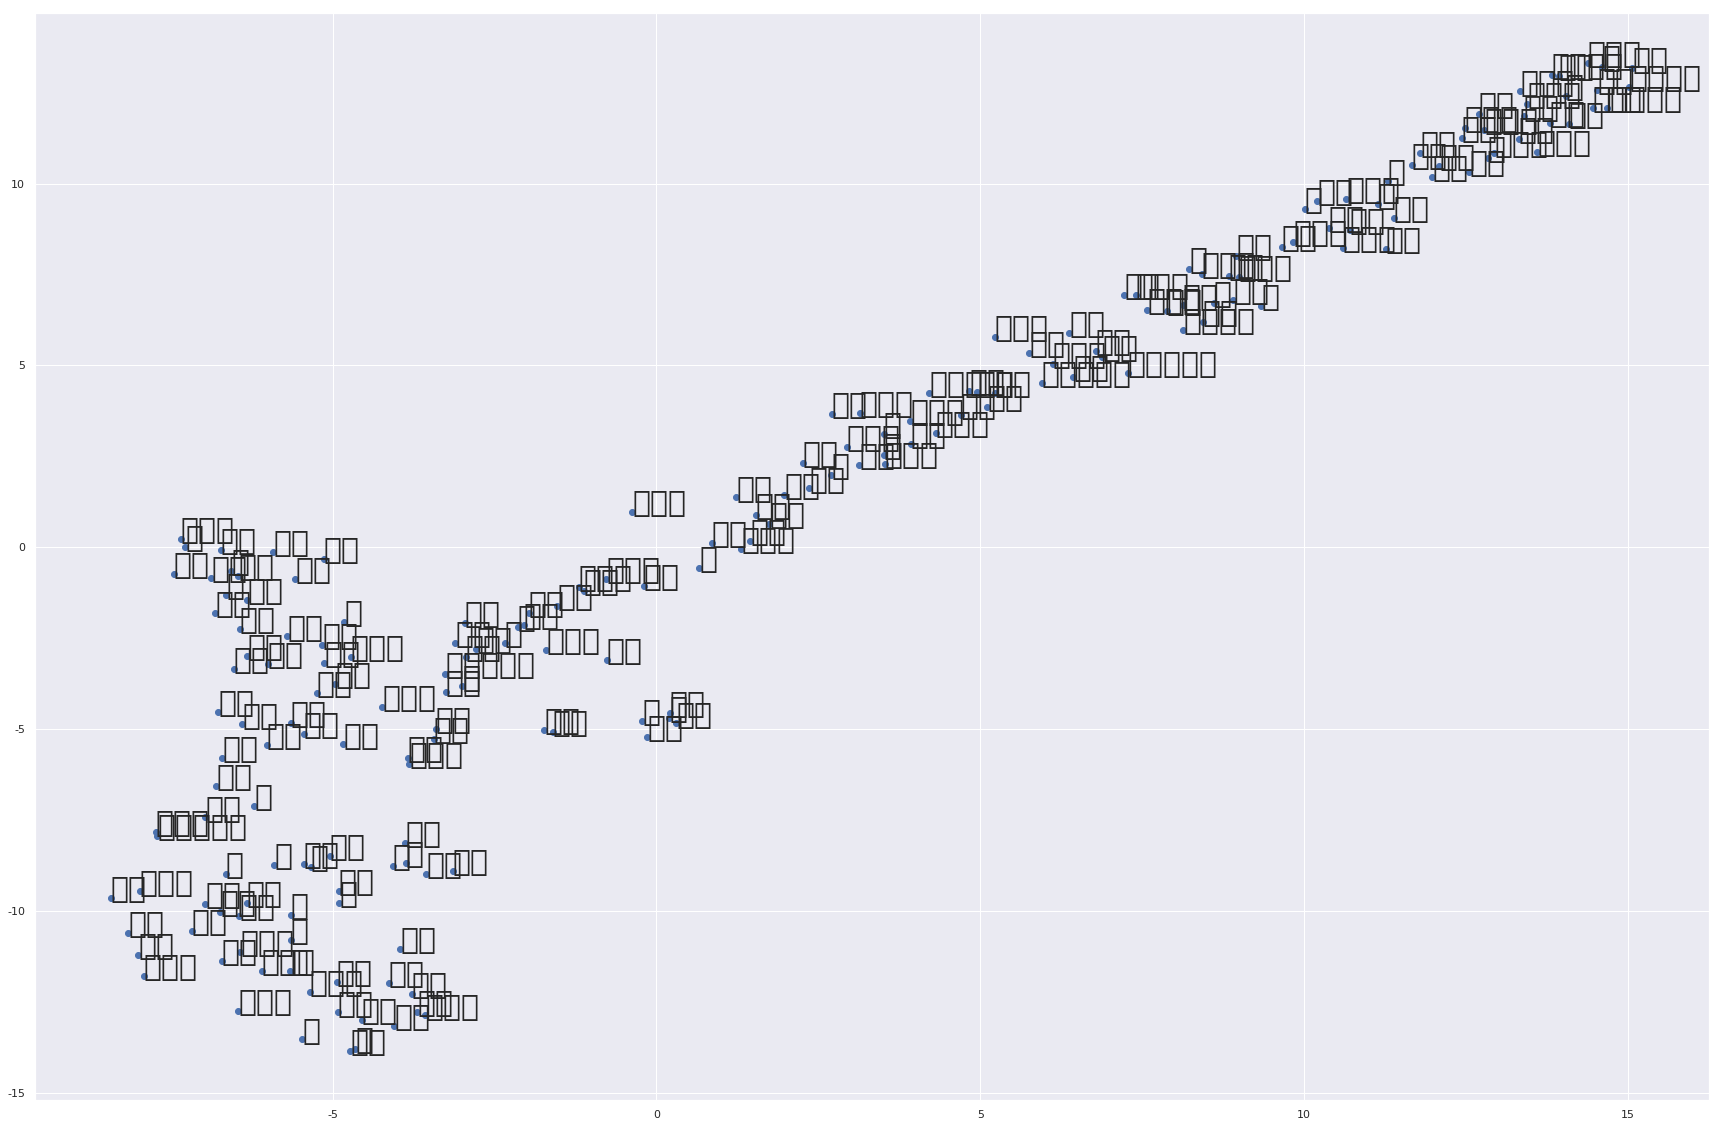

In [152]:
fig = plt.figure()
fig.set_size_inches(30, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word,pos,fontsize=30)
plt.show()

## X, y 정의

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df['clm_prtl_sbc']
y = df['구분']
classle = LabelEncoder()
y = classle.fit_transform(df['구분'].values) # y값 인코딩.
print(np.unique(y))

## train, test 데이터 만들기

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1, random_state=1, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## 단어 벡터화

In [ ]:
stop_dict = ['현상', '현상및점검','현    상','현 상','점검점검','점검내용','조치내용','점검점검내용','현상및조치','C','원인',
             '점검/원인','사진첨부','사진참조','점검및원인','동영상참조','동영상','대리점','고객','고객에게','상기',
             '차량','상기차량은','자동차','당차량은','당차량','당','차량은','점검및조치내용','F LH','F RH','L H','R H','L H리어',
             'R H리어','LH RH','LH','RH','RH','LH','R LH','R RH','리어RH','리어LH','LH쪽','RH쪽','Rr','RR','FRT','Frt',
             'frt','rr','C 10000','C 100','좌','우','A S','결과','공임','광주','넥쏘','니로','레이','렌트','리무진',
             '모닝','모하비','벨로스터','사진','상기','서비스','소하','스타렉스','스팅어','스포티지','신차','싼타페','써비스',
             '쏘나타','쏘렌토','쏘울','아반떼','아산','아이오닉','언덕','엑센트','열','울산','임시 넘버','임시 번호','입고',
             '저머검내용','점검결과','조치결과','주차장','증상','지하','철도','첨부','첨부파일','청구','출고','카 마스터','카니발',
             '카렌스','코나','클레임','투싼','팰리세이드','하이리무진','하이브리드','현     상','현    상','현   상','현  상',
             '현 상','현산','화성','그랜저','새벽','새차','야간','주간','그랜져','주재원','아침','밤, 심야','낮,낫','주제원']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = stop_dict, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 1, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             ngram_range=(1, 3), # BOW의 단위를 1~3개로 지정합니다.
                             max_features = 11364 # 만들 피처의 수, 단어의 수가 된다.
                            )
vectorizer

In [ ]:
#%%time 
train_feature_vector = vectorizer.fit_transform(X_train)
train_feature_vector.shape

In [ ]:
#%%time 
test_feature_vector = vectorizer.fit_transform(X_test)
test_feature_vector.shape

In [ ]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

In [ ]:
dist = np.sum(train_feature_vector, axis=0)
dist_pd = pd.DataFrame(dist, columns=vocab)
dist_pd

In [ ]:
dist_pd_t = dist_pd.T
dist_sort = dist_pd_t.sort_values(by=0, ascending = False)
dist_sort.iloc[1:100, :].plot()

# tf-idf 가중치 적용

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

In [ ]:
# %%time 
train_feature_tfidf = transformer.fit_transform(train_feature_vector)
train_feature_tfidf.shape

In [ ]:
# # %%time 
test_feature_tfidf = transformer.fit_transform(test_feature_vector)
test_feature_tfidf.shape

# 머신러닝 : 학습 및 평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 분류기 사용
from sklearn.model_selection import GridSearchCV  # Grid Search로 하이퍼파라미터 서치 및 모델평가.

# 랜덤포레스트 분류기를 사용
rfc = RandomForestClassifier(random_state=42)

In [ ]:
# Grid Search로 초모수 찾기.
param_range = [100, 200, 300, 400, 500]
param_grid = {
    'bootstrap': [False, True],
    'n_estimators': param_range,
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5)

In [ ]:
# y_label = df_train['result_pred']

In [ ]:
CV_rfc.fit(train_feature_tfidf, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
CV_rfc.best_score_

In [ ]:
forest = RandomForestClassifier(
    n_estimators = 300, n_jobs = -1, random_state=2018, bootstrap=False, criterion='entropy',
    max_depth=8, max_features='auto'
)

In [ ]:
forest = forest.fit(train_feature_tfidf, y_train)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

scoring = 'accuracy'
%time score = cross_val_score(forest, train_feature_vector, y_train, cv=k_fold, n_jobs=-1, scoring=scoring)
score

In [ ]:
round(np.mean(score)*100,2)

# 예측

In [ ]:
y_train_pred = forest.predict(train_feature_vector)
y_test_pred = forest.predict(test_feature_vector)

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))  